In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_palette('Blues')

import base64
import json
from requests import post, get
import math

os.chdir('/Users/ashleyyan/Downloads/Datasets')

## Kaggle link: https://www.kaggle.com/datasets/abdullahorzan/moodify-dataset
Labels: {'sad': 0, 'happy': 1, 'energetic': 2, 'calm': 3}

In [2]:
df = pd.read_csv('278k_labelled_uri.csv', index_col=0)
df = df.drop(['Unnamed: 0', 'spec_rate'], axis = 1)
df.head()

,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,labels,uri
0,195000.0,0.611,0.614,-8.815,0.0672,0.0169,0.000794,0.7530,0.520,128.050,2,spotify:track:3v6sBj3swihU8pXQQHhDZo
1,194641.0,0.638,0.781,-6.848,0.0285,0.0118,0.009530,0.3490,0.250,122.985,1,spotify:track:7KCWmFdw0TzoJbKtqRRzJO
2,217573.0,0.560,0.810,-8.029,0.0872,0.0071,0.000008,0.2410,0.247,170.044,1,spotify:track:2CY92qejUrhyPUASawNVRr
3,443478.0,0.525,0.699,-4.571,0.0353,0.0178,0.000088,0.0888,0.199,92.011,0,spotify:track:11BPfwVbB7vok7KfjBeW4k
4,225862.0,0.367,0.771,-5.863,0.1060,0.3650,0.000001,0.0965,0.163,115.917,1,spotify:track:3yUJKPsjvThlcQWTS9ttYx


In [3]:
df.isna().any()

duration (ms)       False
danceability        False
energy              False
loudness            False
speechiness         False
acousticness        False
instrumentalness    False
liveness            False
valence             False
tempo               False
labels              False
uri                 False
dtype: bool

<Axes: xlabel='labels', ylabel='count'>

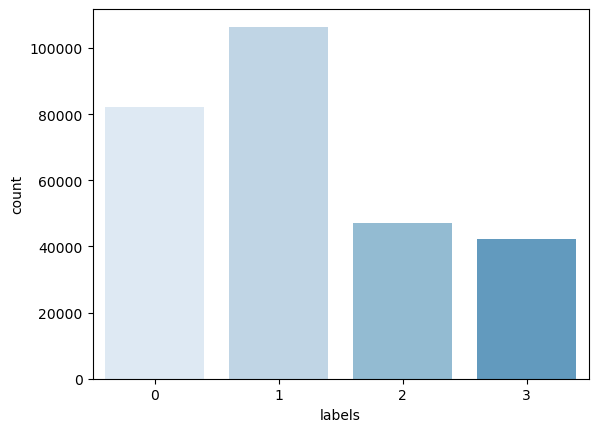

In [4]:
sns.countplot(x = df["labels"])

In [5]:
df.query('labels == 0')

,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,labels,uri
3,443478.0,0.525,0.699,-4.571,0.0353,0.0178,0.000088,0.0888,0.199,92.011,0,spotify:track:11BPfwVbB7vok7KfjBeW4k
8,216187.0,0.516,0.692,-4.842,0.0279,0.0875,0.009300,0.0900,0.181,83.571,0,spotify:track:6TwrBbgTaB5gpl06YQoRKy
9,232333.0,0.548,0.509,-7.937,0.0288,0.2610,0.702000,0.0790,0.484,78.974,0,spotify:track:5SDEirHg6Y8fCYuKMnAaC5
20,270255.0,0.523,0.544,-6.585,0.0578,0.4650,0.000000,0.1210,0.268,75.053,0,spotify:track:4R06uQw0yBQXWmatdIOlch
28,197246.0,0.787,0.462,-7.985,0.0908,0.7240,0.000187,0.1020,0.554,86.994,0,spotify:track:0kJUHCpOr6CFU15kEKAgVF
...,...,...,...,...,...,...,...,...,...,...,...,...
277907,174000.0,0.690,0.439,-9.476,0.0289,0.5480,0.001170,0.1630,0.261,114.118,0,spotify:track:3o2tw8emnaXFAIKBYdKW5T
277909,307880.0,0.577,0.749,-7.215,0.0279,0.5990,0.011500,0.1830,0.255,130.970,0,spotify:track:0BCPKOYdS2jbQ8iyB56Zns
277910,450507.0,0.301,0.853,-2.264,0.0369,0.2080,0.003280,0.3540,0.112,150.423,0,spotify:track:2UjLzxf4oYjHOVOBoVojlL
277927,202693.0,0.707,0.299,-12.468,0.0342,0.4430,0.007590,0.0976,0.480,141.269,0,spotify:track:4M13hC6sdFmvKCJ2MhKEbi


In [6]:
df.nunique()

duration (ms)       114072
danceability          1327
energy                2778
loudness             32201
speechiness           1640
acousticness          5177
instrumentalness      5402
liveness              1766
valence               1941
tempo                93680
labels                   4
uri                 277938
dtype: int64

In [7]:
df = df.sample(n=5000)

<Axes: xlabel='labels', ylabel='count'>

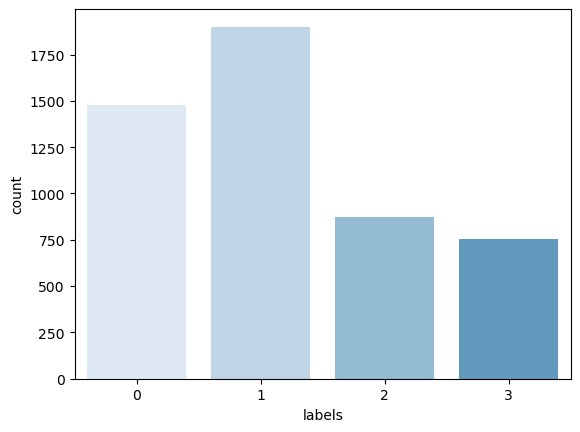

In [8]:
sns.countplot(x = df['labels'])

In [33]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [34]:
y = df['labels']
X = df.drop(['uri', 'labels'], axis = 1) 
# for actual resume project, do feature engineering to remove insignificant features to avoid overfitting

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [37]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.919


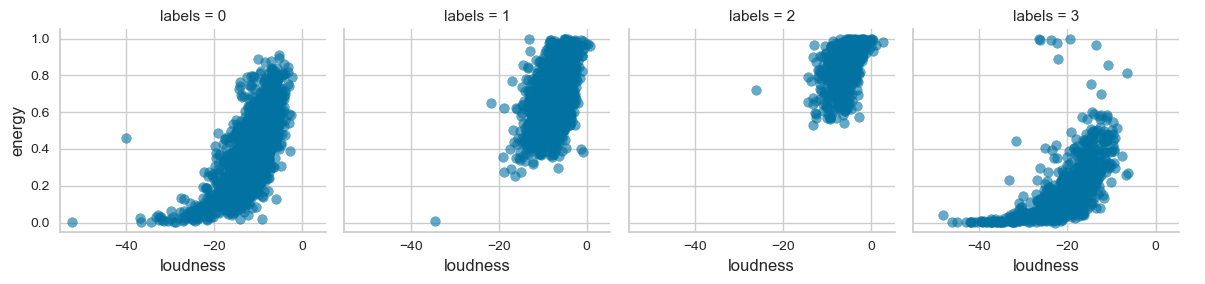

In [38]:
g = sns.FacetGrid(df, col="labels")
g.map(plt.scatter, "loudness", "energy", alpha=.6)
g.add_legend()
plt.show()

In [15]:
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.model_selection import learning_curve

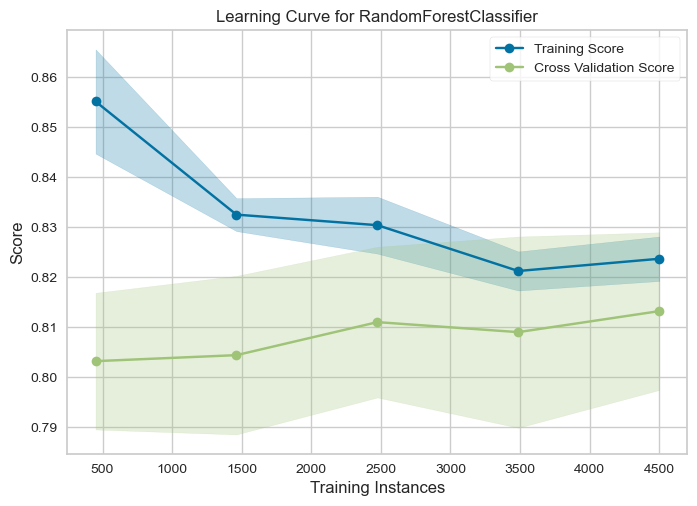

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [16]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0)
print(learning_curve(rfc, X, y, cv=10, scoring='accuracy'))

# Save and load model

In [39]:
import pickle

In [40]:
os.chdir('/Users/ashleyyan/Downloads/spotify-project')

# save the iris classification model as a pickle file
model_pkl_file = "song_mood_classifier.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(xgb, file)

In [19]:
# loading the model
pickle_path = "/Users/ashleyyan/Downloads/spotify-project/song_mood_classifier.pkl"
with open(pickle_path, "rb") as file:
    model = pickle.load(file)
print(model)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)


# Backend (fetch songs and return predicted moods)

In [20]:
client_id = "f56491e8d99045a7b861143d2976beb6"
client_secret = "24df9f28b7ba4f6db82e0bcdeb1b5af5"

In [21]:
def get_token():
    auth_string = client_id + ":" + client_secret
    auth_bytes = auth_string.encode("utf-8")
    auth_base64 = str(base64.b64encode(auth_bytes), "utf-8")

    url = "https://accounts.spotify.com/api/token"
    headers = {
        "Authorization": "Basic " + auth_base64,
        "Content-Type": "application/x-www-form-urlencoded"
    }
    data = {"grant_type": "client_credentials"}
    result = post(url, headers = headers, data = data)
    json_result = json.loads(result.content)
    token = json_result["access_token"]
    return token

def get_auth_header(token):
    return {"Authorization": "Bearer " + token}

def get_playlist(token, playlist_id):
    results = []
    
    url = f"https://api.spotify.com/v1/playlists/{playlist_id}/tracks"
    headers = get_auth_header(token)
    result = get(url, headers = headers)
    if result.status_code != 200:
        print(f'{playlist_id} error') 
    json_result = json.loads(result.content)['tracks']
    results.append(json_result)
    
    total = json_result['total']
    calls = math.ceil(total/100.0) - 1
    for x in range(calls):
        url = json_result['next']
        result = get(url, headers = headers)
        if result.status_code != 200:
            print(f'{playlist_id} error') 
        results.append(json.loads(result.content))
    return(results)

def get_track_ids(playlist):
    ids = []
    for track in playlist['items']:
        if track['track'] is not None:
            id = track['track']['id']
        ids.append(id)
    return ids
    
def get_audio_features(token, track_id):
    url = f'https://api.spotify.com/v1/audio-features/{track_id}'
    headers = get_auth_header(token)
    result = get(url, headers = headers)
    if result is None:
            print(f'{track_id} error') 
    json_result = json.loads(result.content)
    return json_result

def get_song_info(token, track_id):
    url = f'https://api.spotify.com/v1/audio-features/{track_id}'
    headers = get_auth_header(token)
    result = get(url, headers = headers)
    if result is None:
            print(f'{track_id} error') 
    json_result = json.loads(result.content)
    return json_result

In [22]:
def get_audio_features_df(playlist_id):
    token = get_token()
    playlist = get_playlist(token, playlist_id)
    ids = get_track_ids(playlist[0])
    features = []
    for track in ids:
        info = get_audio_features(token, track)
        features.append(info)
        
    # create dataframe
    duration = []
    danceability = []
    energy = []
    loudness = []
    speechiness = []
    acousticness = []
    instrumentalness = []
    liveness = []
    valence = []
    tempo = []
    uri = []

    for song in features:
        try: 
            duration.append(song['duration_ms'])
            danceability.append(song['danceability'])
            energy.append(song['energy'])
            loudness.append(song['loudness'])
            speechiness.append(song['speechiness'])
            acousticness.append(song['acousticness'])
            instrumentalness.append(song['instrumentalness'])
            liveness.append(song['liveness'])
            valence.append(song['valence'])
            tempo.append(song['tempo'])
            uri.append(song['uri'])
        except:
            duration.append(None)
            danceability.append(None)
            energy.append(None)
            loudness.append(None)
            speechiness.append(None)
            acousticness.append(None)
            instrumentalness.append(None)
            liveness.append(None)
            valence.append(None)
            tempo.append(None)
            uri.append(None)
    dictionary = {'duration_ms': duration, 'danceability': danceability, 'energy': energy, 'loudness': loudness,
              'speechiness': speechiness, 'acousticness': acousticness, 'instrumentalness': instrumentalness, 
              'liveness': liveness, 'valence': valence, 'tempo': tempo, 'uri': uri}
    df = pd.DataFrame(dictionary)
    return df

In [23]:
def get_mood_distribution(df):
    df = df.drop(['uri'], axis=1)
    predictions = model.predict(df)
    return predictions

In [24]:
def get_song_info_list(token, track_ids):
    all_tracks = []
    batches = [track_ids[i:i + 50] for i in range(0, len(track_ids), 50)]
    headers = get_auth_header(token)
    for batch in batches:
        params = {
            'ids': ','.join(batch)
        }
        response = get('https://api.spotify.com/v1/tracks', headers=headers, params=params)
        all_tracks.append(response.json()['tracks'])
    return all_tracks

In [25]:
def get_artist_and_popularity(song_info_list):
    song_names = []
    artists = []
    popularities = []
    artist_id = []
    for batch in song_info_list:
        for song in batch:
            song_names.append(song['name'])
            artists.append(song['album']['artists'][0]['name'])
            artist_id.append(song['artists'][0]['id'])
            popularities.append(song['popularity'])
    dictionary = {'song_name':song_names, 'artist':artists, 'song_popularity':popularities, 'artist_id':artist_id}
    return pd.DataFrame(dictionary)

In [26]:
token = get_token()
playlist = get_playlist(token, '1Fqvgp5eqjIfPEqxBmd5WJ?si=50f446c49d6641cc')
ids = get_track_ids(playlist[0])
song_info_list = get_song_info_list(token, ids)
artist_and_popularity_df = get_artist_and_popularity(song_info_list)

In [27]:
def get_artist_info(artist_df):
    names = []
    followers = []
    genres = []
    popularities = []
    counts = []

    token = get_token()
    headers = get_auth_header(token)
    artist_ids = artist_df['artist_id'].to_list()
    
    artist_info_cache = {}
    artist_counts = artist_df['artist_id'].value_counts().to_dict()
    
    for id, count in artist_counts.items():
        if id not in artist_info_cache:
            url = f'https://api.spotify.com/v1/artists/{id}'
            response = get(url, headers=headers).json()
            artist_info_cache[id] = {
                'name': response['name'],
                'followers': response['followers']['total'],
                'genres': response['genres'],
                'popularity': response['popularity']
            }
            
            names.append(artist_info_cache[id]['name'])
            followers.append(artist_info_cache[id]['followers'])
            genres.append(artist_info_cache[id]['genres'])
            popularities.append(artist_info_cache[id]['popularity'])
            counts.append(count)
    dictionary = {'name': names, 'followers': followers, 'genres': genres, 'popularity': popularities,
                  'count': counts}
    return pd.DataFrame(dictionary)

In [ ]:
token = get_token()
playlist = get_playlist(token, '7dO5adNMqOjkindQEXTXE5?si=d4802c2c0ef943fb')
ids = get_track_ids(playlist[0])
song_info_list = get_song_info_list(token, ids)
artist_and_popularity_df = get_artist_and_popularity(song_info_list)